In [1]:
# config all inputs
input_file = "raw/Natural Gas - Reduced.csv";
key="Total Domestic Production"
output_file = "output/forecasted_gas_demand_prophet.csv";
train_date_to = '2022-12-31'
test_date_from = '2023-01-01';

13:03:25 - cmdstanpy - INFO - Chain [1] start processing
13:03:25 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\User\nook-env\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
c:\Users\User\nook-env\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\User\nook-env\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.h

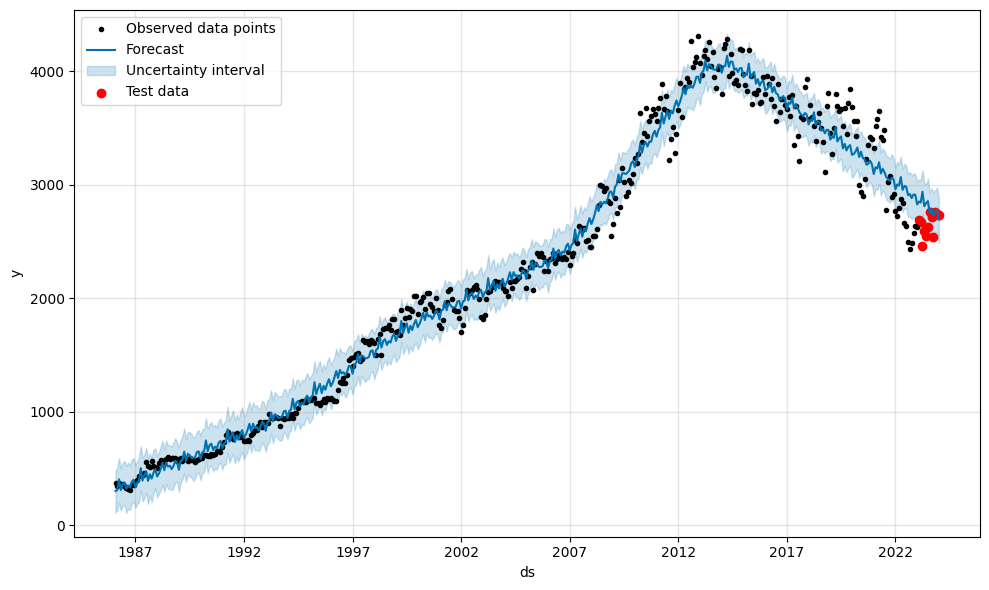

In [30]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# โหลดข้อมูล (ควรเปลี่ยนเส้นทางไฟล์ให้ถูกต้อง)
data = pd.read_csv(input_file, parse_dates=['Date'])

# เปลี่ยนชื่อคอลัมน์ให้ตรงตามที่ Prophet ต้องการ
data.rename(columns={'Date': 'ds', key: 'y'}, inplace=True)
data['ds'] = data['ds'] + pd.offsets.MonthEnd(0) 

# แยกข้อมูลออกเป็น train และ test sets
train = data[data['ds'] <= train_date_to]
test = data[data['ds'] > test_date_from]

# สร้างโมเดล Prophet
model = Prophet()
model.fit(train)

# ทำการพยากรณ์ค่าในอนาคต
future = model.make_future_dataframe(periods=len(test), freq="M")
forecast = model.predict(future)

# วาดกราฟเปรียบเทียบ
fig = model.plot(forecast)
plt.scatter(test['ds'], test['y'], color='red', label='Test data')
plt.legend()
plt.show()



In [41]:
new_forecast = forecast[forecast['ds'] > test_date_from]
new_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
444,2023-01-31,2865.820075,2670.367339,3046.832051,2865.820075,2865.820075,-14.259059,-14.259059,-14.259059,-14.259059,-14.259059,-14.259059,0.0,0.0,0.0,2851.561016
445,2023-02-28,2854.885613,2661.516347,3039.366626,2854.885613,2854.885613,-12.596501,-12.596501,-12.596501,-12.596501,-12.596501,-12.596501,0.0,0.0,0.0,2842.289111
446,2023-03-31,2842.779601,2747.425952,3129.828271,2842.779601,2842.779601,95.182904,95.182904,95.182904,95.182904,95.182904,95.182904,0.0,0.0,0.0,2937.962504
447,2023-04-30,2831.064105,2610.253060,3012.223114,2830.821844,2831.064105,-21.073530,-21.073530,-21.073530,-21.073530,-21.073530,-21.073530,0.0,0.0,0.0,2809.990575
448,2023-05-31,2818.958093,2641.356981,3004.435079,2817.971800,2819.812018,19.461467,19.461467,19.461467,19.461467,19.461467,19.461467,0.0,0.0,0.0,2838.419559
449,2023-06-30,2807.242597,2666.659509,3052.631465,2804.903229,2809.026816,47.663730,47.663730,47.663730,47.663730,47.663730,47.663730,0.0,0.0,0.0,2854.906327
450,2023-07-31,2795.136585,2542.115635,2933.908844,2791.484055,2798.230869,-45.979286,-45.979286,-45.979286,-45.979286,-45.979286,-45.979286,0.0,0.0,0.0,2749.157298
451,2023-08-31,2783.030572,2586.352639,2967.433391,2777.930238,2787.466562,6.154177,6.154177,6.154177,6.154177,6.154177,6.154177,0.0,0.0,0.0,2789.184749
452,2023-09-30,2771.315077,2522.984468,2928.876780,2764.799357,2778.264711,-40.059800,-40.059800,-40.059800,-40.059800,-40.059800,-40.059800,0.0,0.0,0.0,2731.255277
453,2023-10-31,2759.209064,2580.205671,2952.035312,2750.636697,2768.435118,5.431815,5.431815,5.431815,5.431815,5.431815,5.431815,0.0,0.0,0.0,2764.640880


In [42]:
# สร้าง DataFrame สำหรับผลการพยากรณ์
# forecast_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
# forecast_df = forecast_df[forecast_df['ds'].isin(test['ds'])]
forecast_df = pd.DataFrame({
    'date': test["ds"],
    'actual': test["y"],
    'forecast': new_forecast["trend"].values.astype(int)
})


# ตั้งค่า index ของ DataFrame เป็น date
forecast_df.set_index('date', inplace=True)

# ส่งออกผลลัพธ์ไปยังไฟล์ .csv
forecast_df.to_csv(output_file)